<a href="https://colab.research.google.com/github/linh-pn/linh-pn_Assignment1/blob/main/IN6227_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Exploratory Data Analysis (EDA)**

In [43]:
import pandas as pd

# Load training dataset
column_names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
train_data = pd.read_csv('adult.data',header=None, names = column_names)
test_data = pd.read_csv('adult.test',header=None, names = column_names)
print(train_data.head())
print(test_data.head())


   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

In [44]:
# Remove first row in test set
test_data = test_data.iloc[1:]
test_data.reset_index(drop=True, inplace=True)
print(test_data)

      age      workclass    fnlwgt      education  education-num  \
0      25        Private  226802.0           11th            7.0   
1      38        Private   89814.0        HS-grad            9.0   
2      28      Local-gov  336951.0     Assoc-acdm           12.0   
3      44        Private  160323.0   Some-college           10.0   
4      18              ?  103497.0   Some-college           10.0   
...    ..            ...       ...            ...            ...   
16276  39        Private  215419.0      Bachelors           13.0   
16277  64              ?  321403.0        HS-grad            9.0   
16278  38        Private  374983.0      Bachelors           13.0   
16279  44        Private   83891.0      Bachelors           13.0   
16280  35   Self-emp-inc  182148.0      Bachelors           13.0   

            marital-status          occupation     relationship  \
0            Never-married   Machine-op-inspct        Own-child   
1       Married-civ-spouse     Farming-fishing   

In [45]:
# Trim whitespace
train_data = train_data.map(lambda x: x.strip() if isinstance(x, str) else x)
test_data = test_data.map(lambda x: x.strip() if isinstance(x, str) else x)

In [10]:
import numpy as np

# Replace ? with NaN to check missing values in train set
train_data.replace("?", np.nan, inplace=True)
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
from pandas_profiling import ProfileReport

     / 17.8 MB 33.3 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 92.5 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=356222 sha256=d26c59e661cd981ba81255f30390f8b132d2ad2a0a6fcab28630b63d072d48d4
  Stored in directory: /tmp/pip-ephem-wheel-cache-8_8ed566/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b7da4a6111d6297286356385b253b0c903a3ab081c687398fecd5e8a16381e36
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Succe

<ipython-input-4-f8f841d8c7af>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
# Generate exploratory profile report to html
profile = ProfileReport(train_data, title='Income Profile Report', explorative=True)
profile.to_file("income_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Verify that education and education-num are mapped 1-to-1
distinct_combinations = train_data[['education-num', 'education']].drop_duplicates()
sorted_distinct_combinations = distinct_combinations.sort_values(by='education-num')
print(sorted_distinct_combinations)

     education-num     education
224              1     Preschool
160              2       1st-4th
56               3       5th-6th
15               4       7th-8th
6                5           9th
77               6          10th
3                7          11th
415              8          12th
2                9       HS-grad
10              10  Some-college
14              11     Assoc-voc
13              12    Assoc-acdm
0               13     Bachelors
5               14       Masters
52              15   Prof-school
20              16     Doctorate


In [46]:
# Define continuous and categorical variables
continuous_vars = train_data.select_dtypes(include=['float64','int64']).columns.tolist()
categorical_vars = train_data.select_dtypes(include=['object']).columns.tolist()
categorical_vars.remove('income')
print(categorical_vars)
print(continuous_vars)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


<ipython-input-7-2e86d16e2143>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=90)
<ipython-input-7-2e86d16e2143>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=90)
<ipython-input-7-2e86d16e2143>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=90)
<ipython-input-7-2e86d16e2143>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=90)
<ipython-input-7-2e86d16e2143>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=90)
<ipython-input-7-2e86d16e2143>:12: UserWarning: FixedFormatter should 

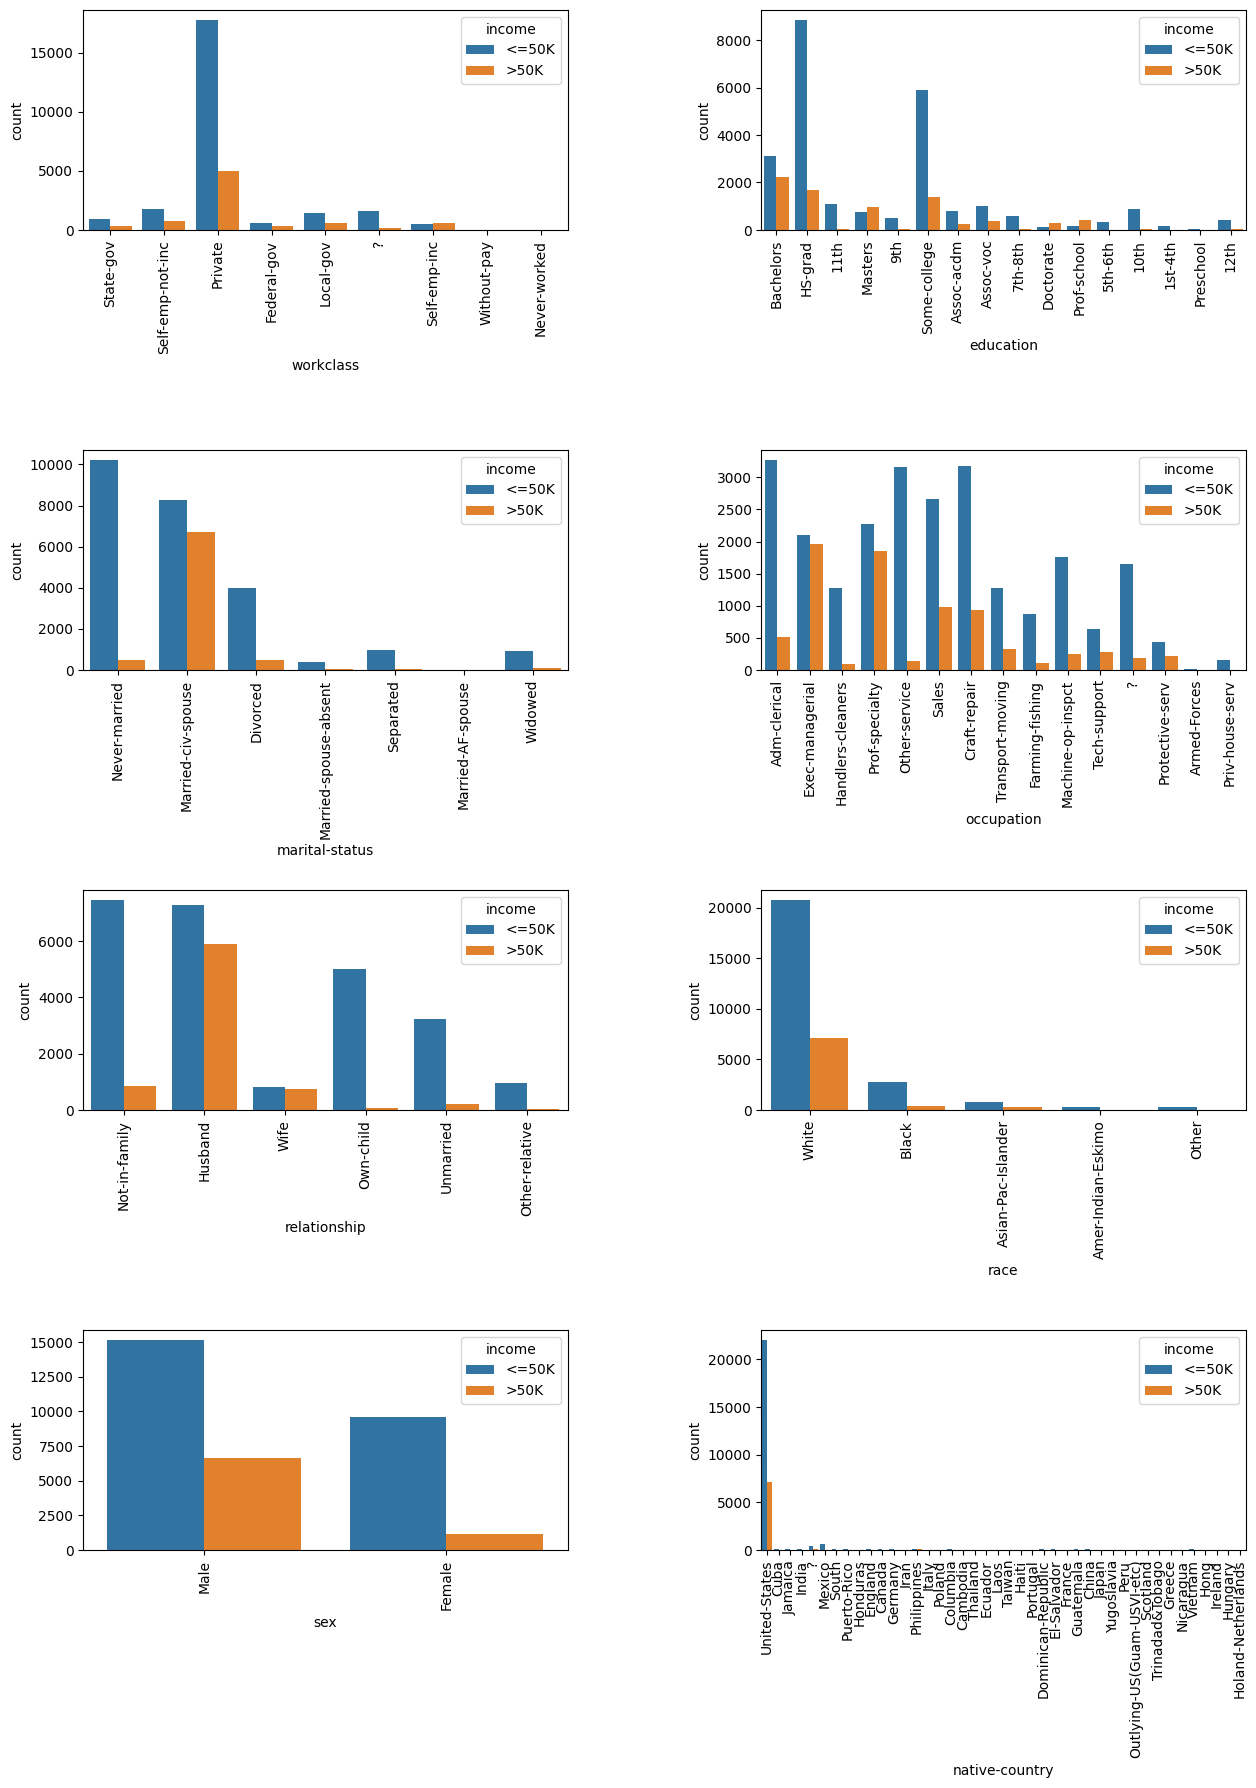

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots (4 rows, 2 columns)
fig, ax = plt.subplots(4, 2, figsize=(15, 20))

# Loop through each categorical variable and its corresponding subplot
for i, var in enumerate(categorical_vars):
    row = i // 2  # Determine the row index
    col = i % 2   # Determine the column index
    sns.countplot(x=var, hue='income', data=train_data, ax=ax[row, col])
    ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=90)

# Adjust layout and show income distribution by categorical variables
plt.subplots_adjust(hspace=1.0, wspace=0.4)
plt.show()

In [8]:
! pip install missingno
import missingno as msno


<Figure size 1000x800 with 0 Axes>

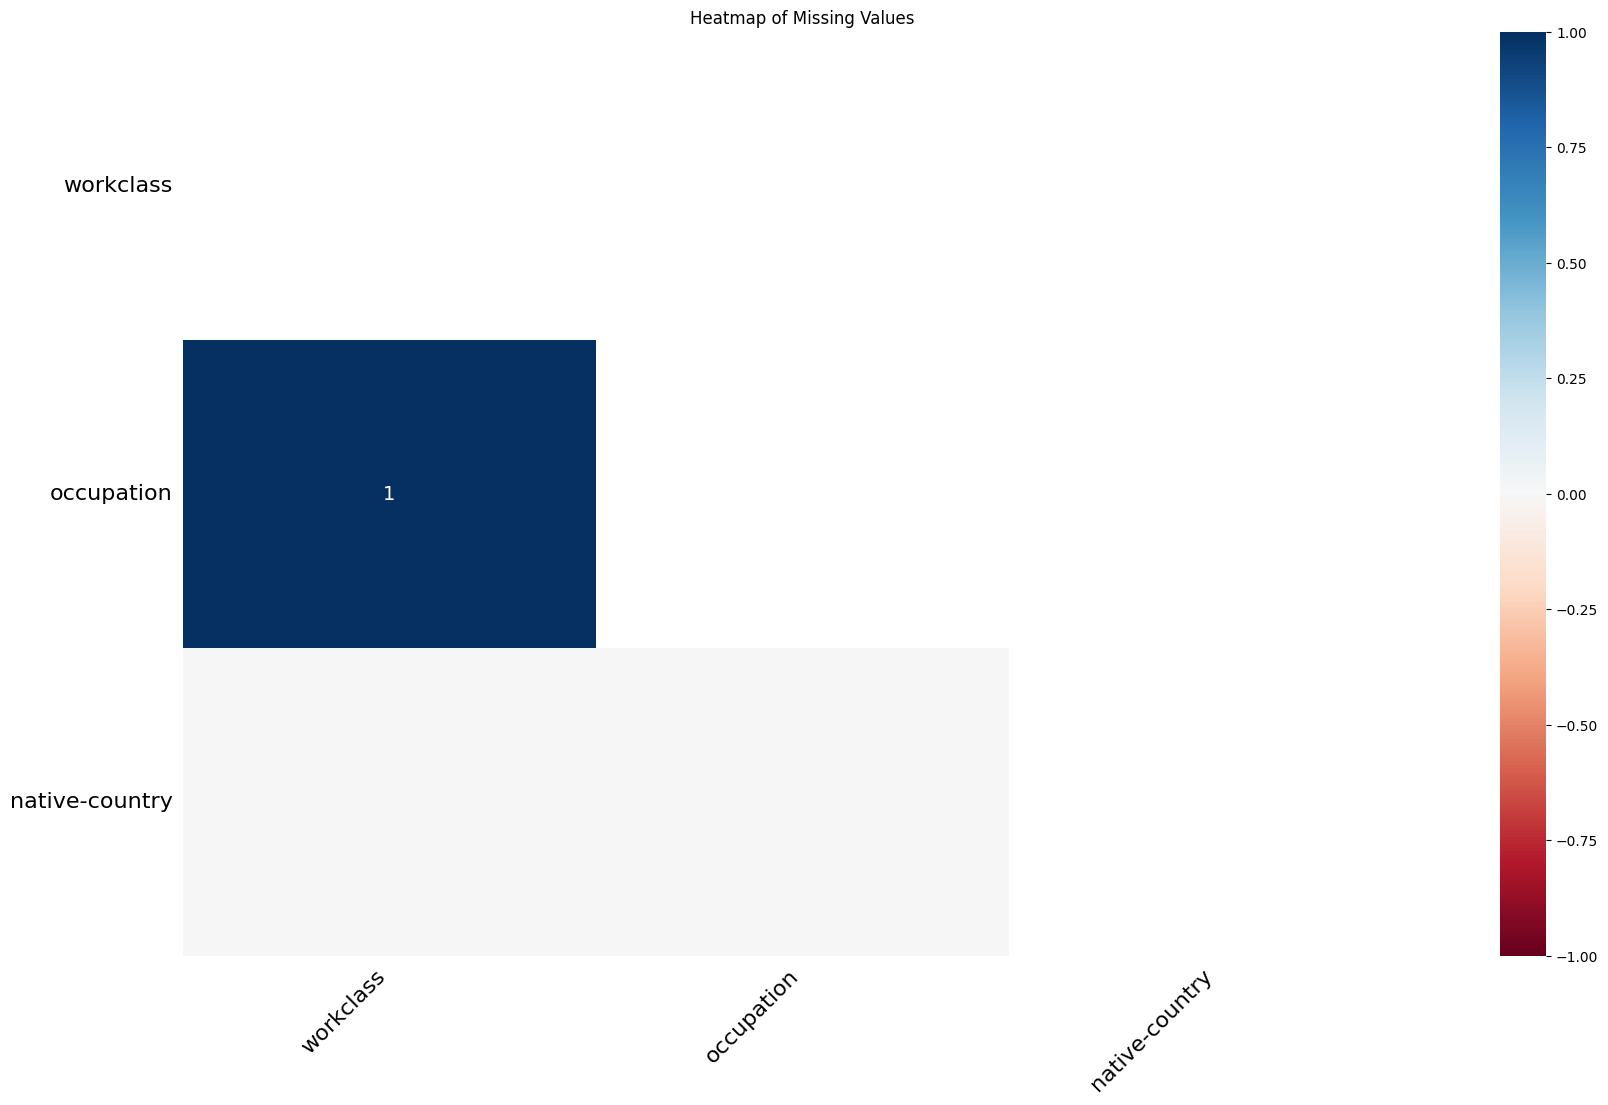

In [11]:
# Heatmap to check random distribution of missing values
plt.figure(figsize=(10, 8))
msno.heatmap(train_data)
plt.title('Heatmap of Missing Values')
plt.show()

In [12]:
# Verify the relationship between missing values of workclass and occupation
# Filter by occupation and get distinct workclass values
filtered_by_occupation = train_data[train_data['occupation'].isnull()]
distinct_workclass_values = filtered_by_occupation['workclass'].unique()
print("Filtered by occupation = unknown, workclass are:")
print(distinct_workclass_values)

# Filter by workclass and get distinct occupation values
filtered_by_workclass = train_data[train_data['workclass'].isnull()]
distinct_occupation_values = filtered_by_workclass['occupation'].unique()
print("Filtered by workclass = unknown, occupation are::")
print(distinct_occupation_values)

Filtered by occupation = unknown, workclass are:
[nan 'Never-worked']
Filtered by workclass = unknown, occupation are::
[nan]


## **2. Data Preprocessing**

In [47]:
# Remove duplicate instances in train set
train_data = train_data.drop_duplicates()
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB
None


In [48]:
# Drop the 'education' column in both train and test sets
train_data = train_data.drop(columns=['education'])
test_data = test_data.drop(columns=['education'])
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education-num   32537 non-null  int64 
 4   marital-status  32537 non-null  object
 5   occupation      32537 non-null  object
 6   relationship    32537 non-null  object
 7   race            32537 non-null  object
 8   sex             32537 non-null  object
 9   capital-gain    32537 non-null  int64 
 10  capital-loss    32537 non-null  int64 
 11  hours-per-week  32537 non-null  int64 
 12  native-country  32537 non-null  object
 13  income          32537 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.7+ MB
None


In [49]:
# Redefine categorical variables
categorical_vars.remove('education')
print(categorical_vars)

['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


In [ ]:
# Transform missing values back into "?"
train_data = train_data.fillna("?")
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education-num   32537 non-null  int64 
 4   marital-status  32537 non-null  object
 5   occupation      32537 non-null  object
 6   relationship    32537 non-null  object
 7   race            32537 non-null  object
 8   sex             32537 non-null  object
 9   capital-gain    32537 non-null  int64 
 10  capital-loss    32537 non-null  int64 
 11  hours-per-week  32537 non-null  int64 
 12  native-country  32537 non-null  object
 13  income          32537 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.7+ MB
None


In [50]:
# Aggregate native-country into {United-States; Others} in both train and test sets
train_data['native-country'] = train_data['native-country'].apply(lambda x: 'United-States' if x == 'United-States' else 'Others')
aggregated_native_country = train_data['native-country'].unique()
test_data['native-country'] = test_data['native-country'].apply(lambda x: 'United-States' if x == 'United-States' else 'Others')
aggregated_native_country_test = test_data['native-country'].unique()
print(aggregated_native_country)
print(aggregated_native_country_test)

['United-States' 'Others']
['United-States' 'Others']


In [51]:
from sklearn.preprocessing import OneHotEncoder

# Encode categorical variables
encoder = OneHotEncoder(drop='first',sparse_output=False, handle_unknown='ignore')
train_encoded = encoder.fit_transform(train_data[categorical_vars])
test_encoded = encoder.transform(test_data[categorical_vars])

# Convert to DataFrame
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(categorical_vars))
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(categorical_vars))

# Combine encoded features with numerical variables
X_train = pd.concat([train_encoded_df, train_data[continuous_vars].reset_index(drop=True)], axis=1)
X_test = pd.concat([test_encoded_df, test_data[continuous_vars].reset_index(drop=True)], axis=1)

# Target variable
y_train = train_data['income'].apply(lambda x: 1 if x == '>50K' else 0)
y_test = test_data['income'].apply(lambda x: 1 if x == '>50K.' else 0)

print(X_train.info())
print(X_test.head())

print(y_train.value_counts())
print(y_test.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 45 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   workclass_Federal-gov                 32537 non-null  float64
 1   workclass_Local-gov                   32537 non-null  float64
 2   workclass_Never-worked                32537 non-null  float64
 3   workclass_Private                     32537 non-null  float64
 4   workclass_Self-emp-inc                32537 non-null  float64
 5   workclass_Self-emp-not-inc            32537 non-null  float64
 6   workclass_State-gov                   32537 non-null  float64
 7   workclass_Without-pay                 32537 non-null  float64
 8   marital-status_Married-AF-spouse      32537 non-null  float64
 9   marital-status_Married-civ-spouse     32537 non-null  float64
 10  marital-status_Married-spouse-absent  32537 non-null  float64
 11  marital-status_

In [54]:
# Check target variable does not contain NaN values
null_income = y_train.isnull().sum()
print(null_income)

0


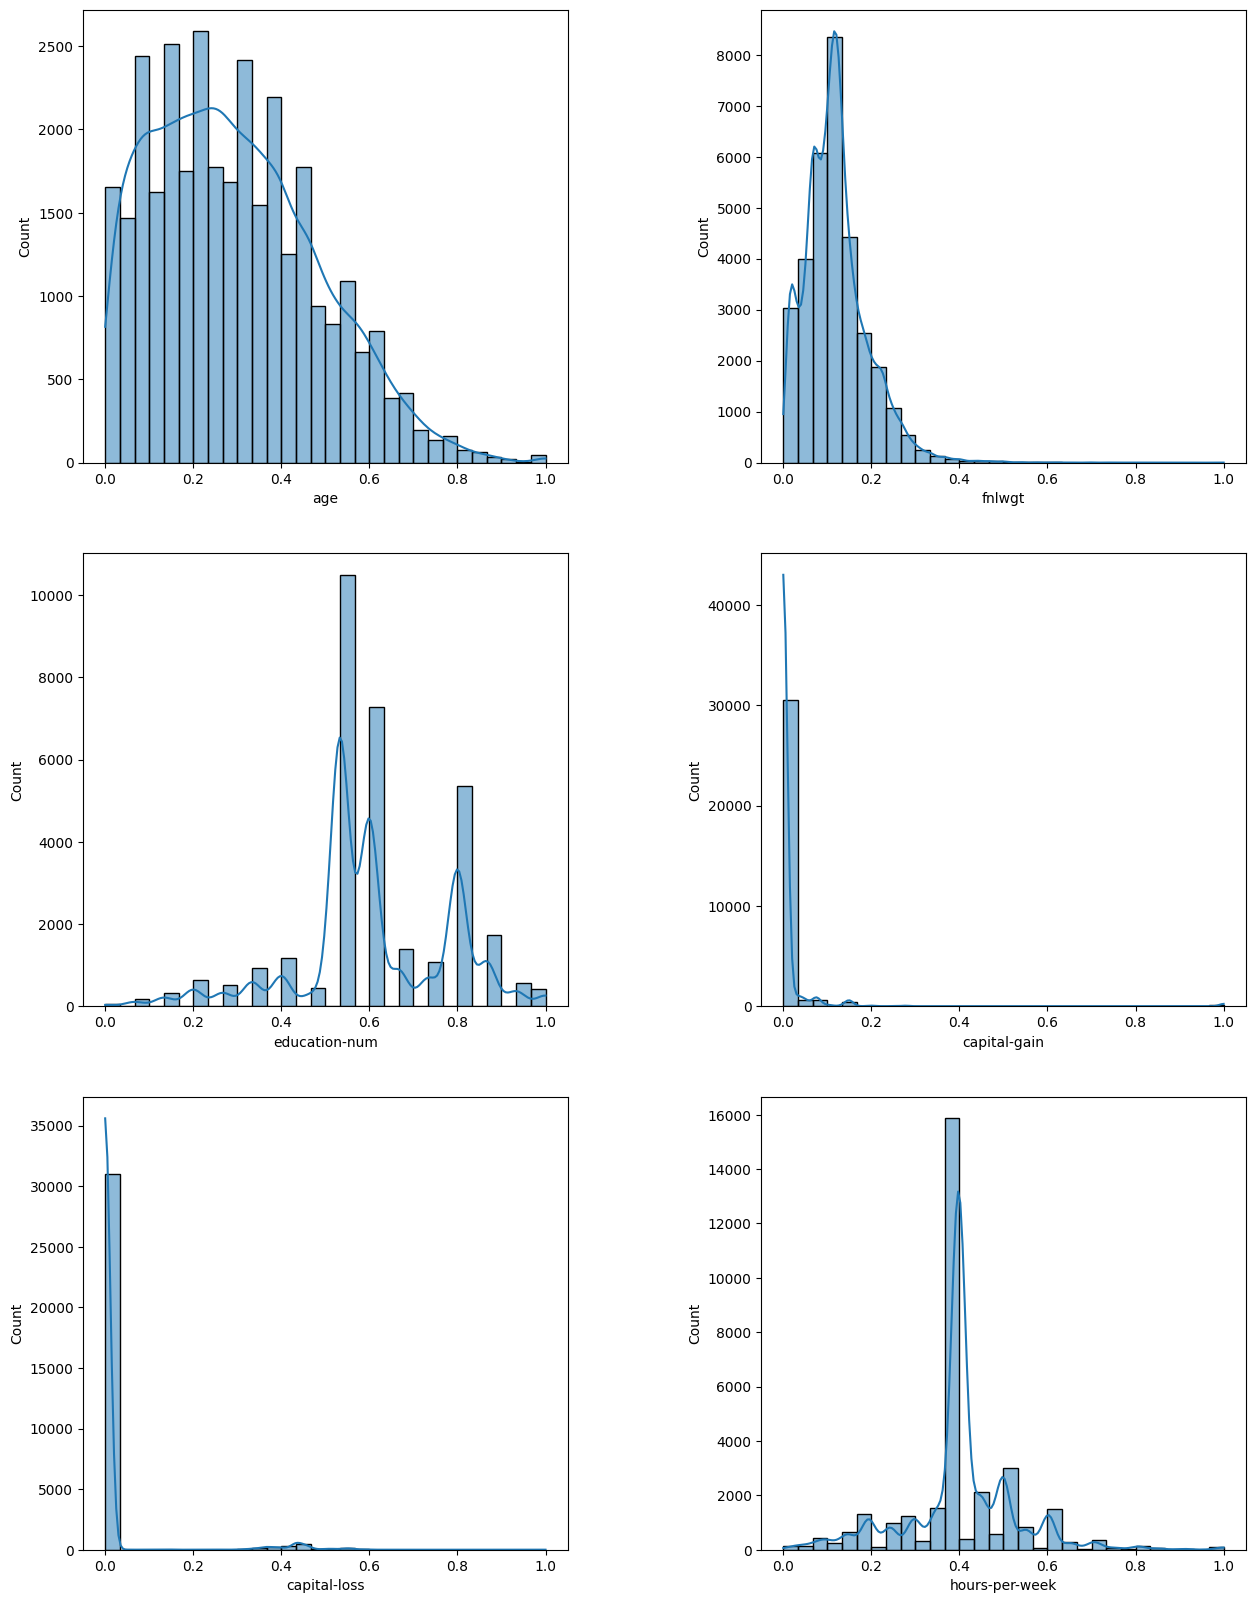

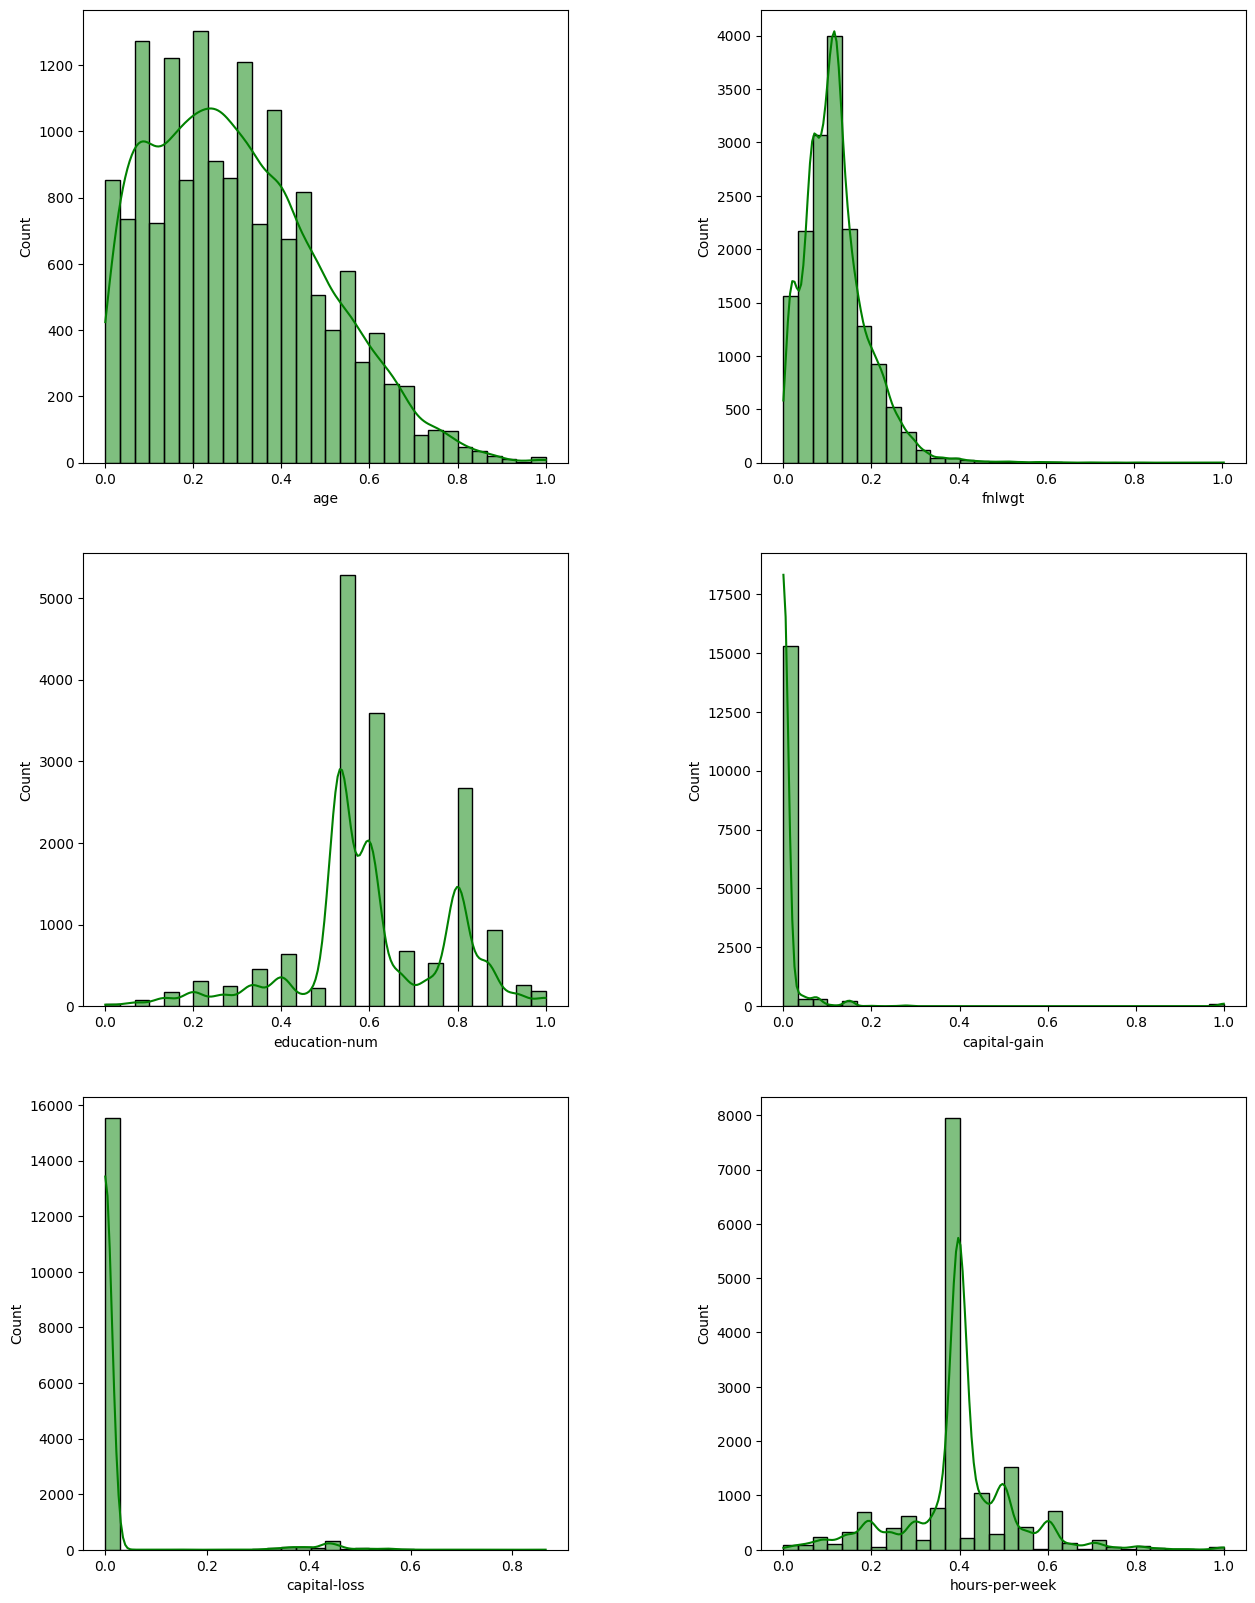

In [58]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize data
scaler = MinMaxScaler()
X_train[continuous_vars] = scaler.fit_transform(X_train[continuous_vars])
X_test[continuous_vars] = scaler.transform(X_test[continuous_vars])

# Check distribution after normalization #
# Create subplots for train set (3 rows, 2 columns)
fig, ax = plt.subplots(3, 2, figsize=(15, 20))

# Loop through each continuous variable and its corresponding subplot
for i, var in enumerate(continuous_vars):
    row = i // 2  # Determine the row index
    col = i % 2   # Determine the column index
    sns.histplot(data=X_train, x=var, ax=ax[row, col], kde=True, bins=30)


# Adjust layout and display subplots
plt.subplots_adjust(hspace=0.2, wspace=0.4)
plt.show()

# Create subplots for test set(3 rows, 2 columns)
fig, ax = plt.subplots(3, 2, figsize=(15, 20))

# Loop through each continuous variable and its corresponding subplot
for i, var in enumerate(continuous_vars):
    row = i // 2  # Determine the row index
    col = i % 2   # Determine the column index
    sns.histplot(data=X_test, x=var, ax=ax[row, col], kde=True, bins=30, color = 'green')

# Adjust layout and display subplots
plt.subplots_adjust(hspace=0.2, wspace=0.4)
plt.show()

## **3. Model Training and Comparison**

### **3.1. Initial Model Training and Evaluation**

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import time

In [79]:
# Initialize models
dt_initial = DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=42)
knn_initial = KNeighborsClassifier(n_neighbors=5)

# Train and evaluate Decision Tree
start_time = time.time()
dt_initial.fit(X_train, y_train)
dt_intial_time = time.time() - start_time

y_pred_dt_intial = dt_initial.predict(X_test)
dt_initial_accuracy = accuracy_score(y_test, y_pred_dt_intial)
dt_initial_report = classification_report(y_test, y_pred_dt_intial)

# Train and evaluate kNN
start_time = time.time()
knn_initial.fit(X_train, y_train)
knn_intial_time = time.time() - start_time

y_pred_knn_initial = knn_initial.predict(X_test)
knn_initial_accuracy = accuracy_score(y_test, y_pred_knn_initial)
knn_initial_report = classification_report(y_test, y_pred_knn_initial)

# Print the results
print("Decision Tree (Initial) Training Time:", dt_intial_time)
print("kNN (Intial) Training Time:", knn_intial_time)

print("Decision Tree (Intial) Accuracy:", dt_initial_accuracy)
print("kNN (Intial)Accuracy:", knn_initial_accuracy)

print(dt_initial_report)
print(knn_initial_report)

Decision Tree (Initial) Training Time: 0.18935680389404297
kNN (Intial) Training Time: 0.013253211975097656
Decision Tree (Intial) Accuracy: 0.8447884036607088
kNN (Intial)Accuracy: 0.8236594803758983
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     12435
           1       0.76      0.51      0.61      3846

    accuracy                           0.84     16281
   macro avg       0.81      0.73      0.76     16281
weighted avg       0.84      0.84      0.83     16281

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     12435
           1       0.65      0.56      0.60      3846

    accuracy                           0.82     16281
   macro avg       0.76      0.73      0.74     16281
weighted avg       0.82      0.82      0.82     16281



### **3.2. Fine-tuning hyperparameters**

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
# Define the parameter grid
param_grid_dt = {
    'criterion': ["gini", "entropy"],
    'max_depth': [None, 5, 10, 15, 20]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_dt, cv=5)

# Fit the model (assuming X_train and y_train are defined)
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': 10}


In [82]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_knn = {
    'n_neighbors': list(range(1,30))
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, cv=5)

# Fit the model (assuming X_train and y_train are defined)
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'n_neighbors': 27}


### **3.3. Retrain the models**

In [83]:
# Initialize models
dt_tuned = DecisionTreeClassifier(criterion="gini",max_depth=10,random_state=42)
knn_tuned = KNeighborsClassifier(n_neighbors=27)

# Train and evaluate Decision Tree
start_time = time.time()
dt_tuned.fit(X_train, y_train)
dt_tuned_time = time.time() - start_time

y_pred_dt_tuned = dt_tuned.predict(X_test)
dt_tuned_accuracy = accuracy_score(y_test, y_pred_dt_tuned)
dt_tuned_report = classification_report(y_test, y_pred_dt_tuned)

# Train and evaluate kNN
start_time = time.time()
knn_tuned.fit(X_train, y_train)
knn_tuned_time = time.time() - start_time

y_pred_knn_tuned = knn_tuned.predict(X_test)
knn_tuned_accuracy = accuracy_score(y_test, y_pred_knn_tuned)
knn_tuned_report = classification_report(y_test, y_pred_knn_tuned)

# Print the results
print("Decision Tree (Tuned) Training Time:", dt_tuned_time)
print("kNN (Tuned) Training Time:", knn_tuned_time)

print("Decision Tree (Tuned) Accuracy:", dt_tuned_accuracy)
print("kNN (Tuned) Accuracy:", knn_tuned_accuracy)

print(dt_tuned_report)
print(knn_tuned_report)

Decision Tree (Tuned) Training Time: 0.16980957984924316
kNN (Tuned) Training Time: 0.014969825744628906
Decision Tree (Tuned) Accuracy: 0.8603894109698421
kNN (Tuned) Accuracy: 0.8377249554695657
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     12435
           1       0.76      0.59      0.67      3846

    accuracy                           0.86     16281
   macro avg       0.82      0.77      0.79     16281
weighted avg       0.85      0.86      0.85     16281

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     12435
           1       0.69      0.57      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.74      0.76     16281
weighted avg       0.83      0.84      0.83     16281



Text(792.3131313131312, 0.5, 'True Label')

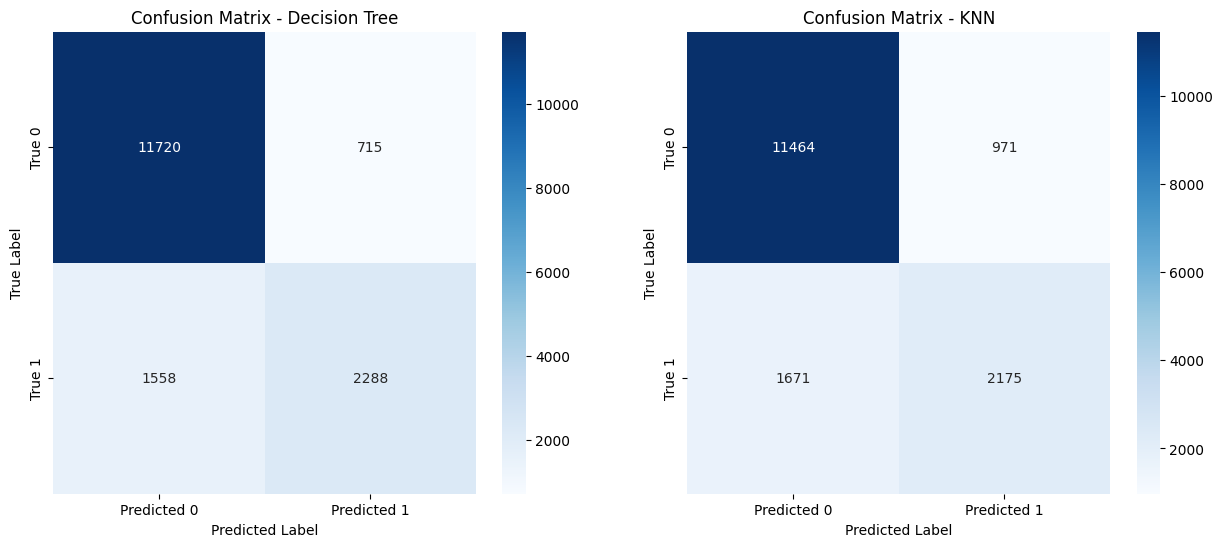

In [84]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for decision tree and knn
cm_dt_tuned = confusion_matrix(y_test, y_pred_dt_tuned)
cm_knn_tuned = confusion_matrix(y_test, y_pred_knn_tuned)

# Create subplots for test set(3 rows, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Confusion matrix for Decision Tree
sns.heatmap(cm_dt_tuned, annot=True, fmt='d', cmap='Blues',
            ax=ax[0],
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['True 0', 'True 1'])
ax[0].set_title('Confusion Matrix - Decision Tree')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

# Confusion matrix for KNN
sns.heatmap(cm_knn_tuned, annot=True, fmt='d', cmap='Blues',
            ax=ax[1],
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['True 0', 'True 1'])
ax[1].set_title('Confusion Matrix - KNN')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')
